In [1]:
import pandas as pd
#import the dataset
df=pd.read_csv('D:\MSFT.csv')

In [2]:
#read the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9405,2023-07-10,334.600006,335.230011,327.589996,331.829987,331.829987,32791400
9406,2023-07-11,331.059998,332.859985,327.000000,332.470001,332.470001,26698200
9407,2023-07-12,336.600006,341.649994,335.670013,337.200012,337.200012,29995300
9408,2023-07-13,339.559998,343.739990,339.019989,342.660004,342.660004,20567200


In [3]:
#disply only two columns of the dataset by discarding the other columns
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9405,2023-07-10,331.829987
9406,2023-07-11,332.470001
9407,2023-07-12,337.200012
9408,2023-07-13,342.660004


In [4]:
df['Date']
#'Date' is a string 

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9405    2023-07-10
9406    2023-07-11
9407    2023-07-12
9408    2023-07-13
9409    2023-07-14
Name: Date, Length: 9410, dtype: object

In [5]:
#converting 'Date' from string to int (objects)
import datetime
def str_to_datetime(s):
    split=s.split('-')
    year, month, day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object=str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [6]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']
#now,'Date' is converted to int objects

C:\Users\kvkv6\AppData\Local\Temp/ipykernel_15424/1744593409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9405   2023-07-10
9406   2023-07-11
9407   2023-07-12
9408   2023-07-13
9409   2023-07-14
Name: Date, Length: 9410, dtype: datetime64[ns]

In [7]:
#make 'Date' column the index
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-07-10,331.829987
2023-07-11,332.470001
2023-07-12,337.200012


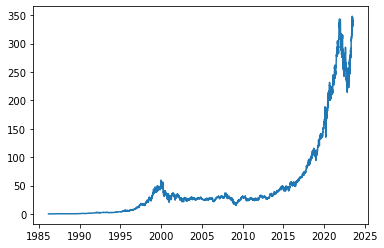

In [8]:
#plot data using matplotlib
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [9]:
#LSTM needs the model to be converted into a supervised learning framework
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        if last_time:
            break
        target_date = next_date
        if target_date == last_date:
            last_time = True
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    return ret_df
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-07-14', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
575,2023-07-10,338.149994,341.269989,337.220001,331.829987
576,2023-07-11,341.269989,337.220001,331.829987,332.470001
577,2023-07-12,337.220001,331.829987,332.470001,337.200012
578,2023-07-13,331.829987,332.470001,337.200012,342.660004


In [10]:
#convert data into numpy arrays to feed it directly into tensorflow model 
def windowed_df_to_date_X_y(windowed_dataframe):
#get date, input matrix is x and y is the output vector
#parameter = windowed_dataframe
#convert whole dataframe into numpy array
    df_as_np=windowed_dataframe.to_numpy()
#getting the dates
    dates = df_as_np[:, 0]
#input matrix is obtained from a middle matrix
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
#output vector   
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
#calling the function
dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((580,), (580, 3, 1), (580,))

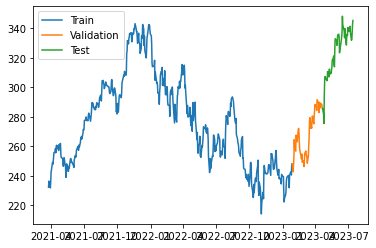

In [11]:
#split into train, validation, test
#train = trains the model
#validation = helps to train the model
#test = evaluate the performance
#integer of length of dates
#80%
q_80 = int(len(dates) * .8)
#90%
q_90 = int(len(dates) * .9)
#training - first 80%
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
#validation - 80% to 90%
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
#test - final 10%
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
#visualize 
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [12]:
#train the model
#do the necessary imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#create the model
#specify the shape of input
#64 LSTM is big but not relatively big number of neurons
#add a dense layer 
#stacking dense layers
#activation function = ReLu
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
#compile the model
#loss function = Mean Squared error
#optimizer = Adam
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
#fit the model
#100 epochs = 100 runs in the dataset
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 58ms/step - loss: 76812.6094 - mean_absolute_error: 275.4558 - val_loss: 71339.9141 - val_mean_absolute_error: 266.6924
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 76018.9062 - mean_absolute_error: 274.0085 - val_loss: 70331.4922 - val_mean_absolute_error: 264.7946
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 74621.5234 - mean_absolute_error: 271.4398 - val_loss: 68591.7031 - val_mean_absolute_error: 261.4883
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 72277.0547 - mean_absolute_error: 267.0768 - val_loss: 65493.1133 - val_mean_absolute_error: 255.4949
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 68280.4141 - mean_absolute_error: 259.4846 - val_loss: 60501.4062 - val_mean_absolute_error: 245.5316
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 62120.9336 - mean_absolute_error: 247.3176 - val_lo

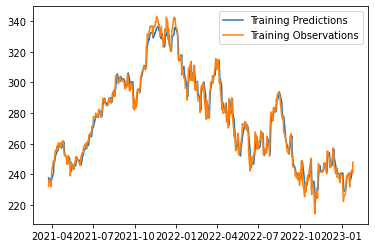

In [13]:
#training
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

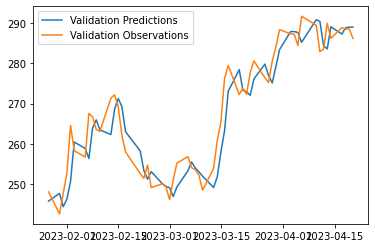

In [14]:
#validation
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

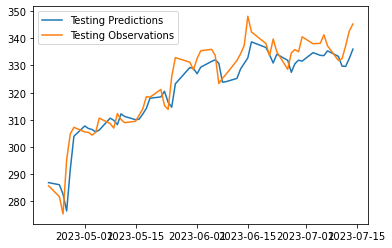

In [15]:
#testing
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

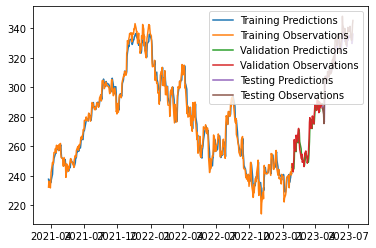

In [16]:
#plotting altogether in the same graph
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [17]:
from copy import deepcopy
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

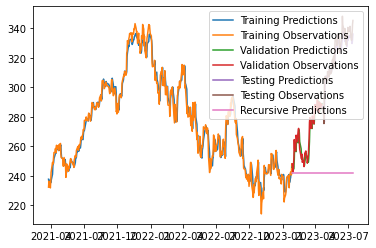

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])